<center><h1>Bangalore House Price Prediction</h1></center>

![image.png](https://media.architecturaldigest.in/wp-content/uploads/2019/08/Bangalore-Brick-House-CollectiveProject.jpg)

### Description

What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.
For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

### Problem Statement

To analyze these Bangalore House Data and to determine the approximate price for the houses

### Data Description

Columns:

    area_type
    availability
    location
    size
    society
    total_sqft
    bath
    balcony
    price

### Business objectives and constraints

1. The cost of a mis-classification can be high.
2. There is strict latency concerns.
3. From this project, we will be able to understand how house prices depend on other factors

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

### Importing the data

In [2]:
df = pd.read_csv("C:/Users/Asus/Documents/Important Docs/Projects/1. Banglore Price Prediction/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Exploratory Data Analysis (EDA)

In [3]:
# Printing the shape of the dataframe
df.shape

(13320, 9)

In [4]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Here we can see that location, size, society, bath and balcony columns have some null values in them

In [5]:
# Summary of our Dataset
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
# Checking the count of null values in each column
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
# Performing Group by operation on Area Type
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
# Checking the data info again to find out less important features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
# Dropping less important features
df = df.drop(["area_type", "balcony", "society", "availability"], axis = "columns")

In [10]:
df.shape

(13320, 5)

In [11]:
# Dropping null values
df = df.dropna()

In [12]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df.shape

(13246, 5)

### Feature Engineering

In [14]:
# Checking the unique values in size column
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Here, we can see that Bedroom is represented by 2 different methods. One is BHK and the other is Bedroom. So, we are making a new column BHK and discarding all the units (like BHK, Bedroom)

In [15]:
# Creating column BHK
df['BHK'] = df["size"].apply(lambda x:int(x.split(" ")[0]))

In [16]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df = df.drop("size", axis = "columns")

In [18]:
# Checking unique values of total_sqft column
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
# Creating a function to convert the values to float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
# Checking the values of total_sqft which cannot be converted into float
df[~df["total_sqft"].apply(is_float)].head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


This shows us that total_sqft can be a range (say, 3090-5002). For such cases, we can take an average of the minimum and maximum value in the range. There are other cases such as 34.46Sq. Meter which can be converted to square feet uding unit conversion. So, we are going to just drop such corner cases to keep things simple.

In [21]:
def convert_sqft_to_number(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
# Converting the values in total_sqft to floats
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_number)
df.head(10)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


Now, we will add another feature called Price per Square Feet

In [23]:
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [24]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df["location"].value_counts(ascending = False)
location_stats

Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
Jaymahal Road              1
Shirdi Sai Nagar           1
1Kasavanhalli              1
Reliable Woods Layout      1
SARJAPUR BAGALUR ROAD      1
Name: location, Length: 1293, dtype: int64

In [25]:
len(location_stats[location_stats<=10])

1052

In [26]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage            10
Sector 1 HSR Layout      10
Naganathapura            10
Ganga Nagar              10
Basapura                 10
                         ..
Jaymahal Road             1
Shirdi Sai Nagar          1
1Kasavanhalli             1
Reliable Woods Layout     1
SARJAPUR BAGALUR ROAD     1
Name: location, Length: 1052, dtype: int64

In [27]:
df.location = df.location.apply(lambda x: x if x not in location_stats_less_than_10 else 'others')
len(df.location.unique())

242

In [28]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


Now we will discard some more data. Because, normally if 1 bedroom is 300 sqft. (i.e. 2 BHK apartment is minimum 600 sqft. If you have for example 400 sqft 2BHK apartment, then that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum threshold per BHK to be 300 sqft

In [29]:
df[(df.total_sqft/df.BHK)<300].head()

,location,total_sqft,bath,price,BHK,price_per_sqft
9,others,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,others,500.0,3.0,100.0,3,20000.000000


Here, we can see that a 6 BHK apartment has only 1020 sqft area which is clearly an outlier. Similarly all the above values seem suspicious and can be removed as outliers

In [30]:
# Removing the values which has less than 300 sqft area per BHK
df = df[~(df.total_sqft/df.BHK<300)]

In [31]:
df.shape

(12502, 6)

In [32]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12456.000000,12502.000000,12502.000000,12502.000000,12456.000000
mean,1590.189927,2.564790,111.311915,2.650696,6308.502826
std,1260.404795,1.084946,152.089966,0.981698,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


Here we see that minimum price per square feet is Rs 267 whereas maximum is Rs 1,76,470. This shows a wide variation in the property prices. We should remove outliers per location using mean and standard deviation.

In [33]:
# removing price_per_sqft outliers
df_out = pd.DataFrame()
for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    sd = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft <= (m+sd))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
df = df_out
df.shape

(10241, 6)

In [34]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


### Data Visualization

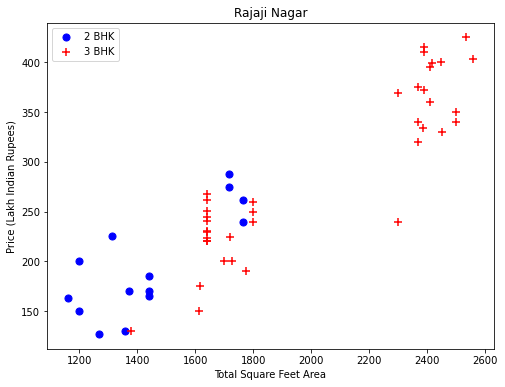

In [35]:
# Plotting scatter plot for 2 BHK and 3 BHK properties
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = "+", color = "red", label = "3 BHK", s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df, "Rajaji Nagar")

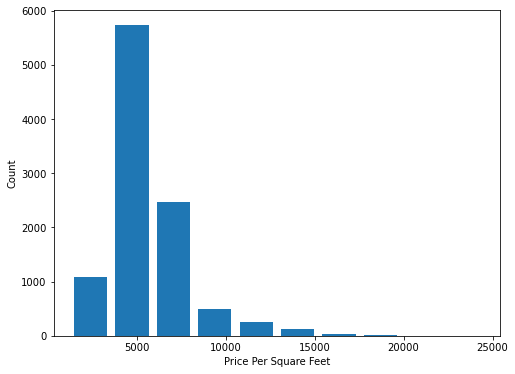

In [36]:
# Plotting a histogram for Price per Square Feet vs Count
plt.hist(df.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

Most of the listings have price nearly Rs 5000 per sqft

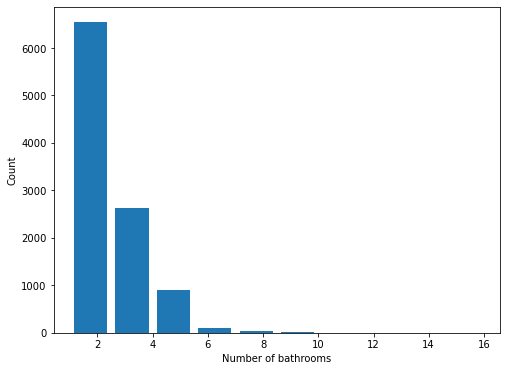

In [37]:
# Plotting a histogram for Number of Bathrooms vs Count
plt.hist(df.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [38]:
# Checking the flats with more than 10 bathrooms
df[df.bath>10]

,location,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,others,12000.0,12.0,525.0,10,4375.000000
8575,others,10000.0,16.0,550.0,16,5500.000000
9308,others,6000.0,12.0,150.0,11,2500.000000
9639,others,5425.0,13.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we are discarding that also.

In [39]:
df = df[~(df.bath>df.BHK+2)]

In [40]:
df.shape

(10237, 6)

### Using One Hot Encoding for Location

In [41]:
dummies = pd.get_dummies(df.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Concatinating both the dataframes together (dummies and df)

In [42]:
df = pd.concat([df,dummies.drop("others", axis = "columns")], axis = "columns")

In [43]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df = df.drop("location", axis = "columns")

In [45]:
df.head()

,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X = df.drop(['price', "price_per_sqft"], axis = "columns")
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y = df.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [48]:
X.shape

(10237, 244)

In [49]:
y.shape

(10237,)

### Train-Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [51]:
lr = LinearRegression()                 #Creating model object
lr.fit(X_train, y_train)                #Fitting the model
lr.score(X_test, y_test)                #Finding score for validating the model

0.8151691492500549

In [52]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.81293955, 0.77537358, 0.82415698, 0.80235722, 0.84442196])

Here we are using Grid Search CV for 3 different types of Regression models
1. Linear Regression
2. Lasso Regression
3. Decision Tree Regression

### Model Building

In [53]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize': [True, False]
            }
        },
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision_Tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        GridSearch = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        GridSearch.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': GridSearch.best_score_,
            'best_params': GridSearch.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

### Model Evaluation

In [54]:
find_best_model_using_gridsearchcv(X,y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 569, in fit
    linalg.lstsq(X, y)
  File "C:\Users\Asus\anaconda3\lib\site-packages\scipy\linalg\basic.py", line 1207, in lstsq
    raise LinAlgError("SVD did not converge in Linear Least Squares")
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan

,model,best_score,best_params
0,Linear_regression,0.811850,{'normalize': False}
1,Lasso,0.689160,"{'alpha': 1, 'selection': 'random'}"
2,Decision_Tree,0.705376,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


### From all the above models, we can clearly say that Linear Regression perform best for this dataset.

### Model Testing

In [55]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

Here we are predicting the house prices based on Location, Size, Bathroom, Baths

In [56]:
# Predict prices as per our  input
predict_price('Indira Nagar', 2000, 3, 3)

235.61951214140907